# Utilities
This section contains functions we need later.

In [79]:
import polars as pl
import polars.selectors as cs
import re
from pathlib import Path
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
def extract_id(s) -> int:
    # Extract VAC from string
    match = re.search(r'(\d+)', s)

    if match is None:
        raise ValueError(f"Could not match ID from {s}")
    else:
        return int(match.group(1)) 

def parse_enum_string(s: str):
    parts = re.split(r'(?=\d+\.)', s)  # split before occurrences like "1."
    result = {}
    for part in parts:
        m = re.match(r'\s*(\d+)\.\s*(.*)', part)
        if m:
            key = int(m.group(1))
            value = m.group(2).strip()
            if value:
                result[key] = value
    return result


def rename_code_columns(s: str):
    parts = re.split(r'(?=\d+\.)', s)  # split before occurrences like "1."
    matches = re.findall(r'(_\d)',s)

    if len(matches) > 0:
        num = matches[-1]
    else:
        num = ''

    if parts:
        return parts[0].strip() + num
    else:
        return s + num

In [3]:
# renaming scheme for the columns in the excel sheet to a more usable format, removing the data dictionary from column name and disambiguating duplicated columns

rename_map = {
    'VAC': 'VAC',
    'Data collection by': 'data_collector',
    '# Appts: 1,2,3,4,5,6, NA (duplicate)': 'num_appts',
    'Age At Consult': 'age_at_consult',
    'Year of Birth': 'year_of_birth',
    'sex': 'sex',
    'Educ Yrs': 'education_years',
    'Race 1.Caucasian 2. Africanamerican 3. Asian 4.other': 'race',
    'ethnicity 0.non hispanic 1.hispanic': 'ethnicity',
    'occupation 1. working 2. retired 3. unemployed': 'occupation',
    'Marital status 1. Single never married 2. married 3. divorced/widowed': 'marital_status',
    'living situation 1. Alone 2. Family 3. CRC 4. ALF 5. NH 6. inpatient': 'living_situation',
    'aPET 0. No 1. Yes': 'apet',
    'Date Performed': 'date_performed',
    '# of visits until PET ordered': 'visits_until_pet',
    'PET result 1.Normal 2.Abnormal': 'pet_result',
    '1st Appt Date': 'appt_date_1',
    'MOCA': 'moca_1',
    't-MOCA': 'tmoca_1',
    'Function 1.independent 2. dep any iADLs 3. dependent all iADLs 4.  dep any bADLs 5. dependent all bADLs ': 'function_1',
    'Behavioral disturbance 0. No 1. Yes (anger, irritability, disinhibition)': 'behavioral_disturbance_1',
    'Cognitive syndrome 1st 1.Unimpaired 2.SCD 3. MCI 4. Dementia': 'cognitive_syndrome_1',
    'NBSE Date': 'nbse_date',
    'Second visit date': 'fu_date_2',
    'MoCA': 'moca_2',
    't-MOCA_1': 'tmoca_2',
    'Function 1.independent 2. dep any iADLs 3. dependent all iADLs 4.  dep any bADLs 5. dependent all bADLs _1': 'function_2',
    'Behavioral disturbance 0.No 1.Yes': 'behavioral_disturbance_2',
    'Cognitive syndrome 2nd 1.Unimpaired 2.SCD 3. MCI 4. Dementia': 'cognitive_syndrome_2',
    'Medication Change 0.No 1.Yes': 'med_change_1',
    'Living situation change 0.No 1.Yes': 'living_situation_change_1',
    "DC'd 0.no 1.yes": 'discharged_1',
    '3rd Visit': 'fu_date_3',
    'MOCA Total': 'moca_3',
    't-MOCA_2': 'tmoca_3',
    'Function 1.independent 2. dep any iADLs 3. dependent all iADLs 4.  dep any bADLs 5. dependent all bADLs _2': 'function_3',
    'Behavioral disturbance  0.No 1.Yes': 'behavioral_disturbance_3',
    'Cognitive syndrome 1st 1.Unimpaired 2.SCD 3. MCI 4. Dementia_1': 'cognitive_syndrome_3',
    'Med Change 0.No 1.Yes': 'med_change_2',
    'Living situation change 0.No 1.Yes_1': 'living_situation_change_2',
    "DC'd 0.no 1.yes_1": 'discharged_2',
    'Fourth fu date': 'fu_date_4',
    'MOCA Total_1': 'moca_4',
    't-MoCA': 'tmoca_4',
    'Function 1.independent 2. dep any iADLs 3. dependent all iADLs 4.  dep any bADLs 5. dependent all bADLs _3': 'function_4',
    'Behavioral disturbance  0.No 1.Yes_1': 'behavioral_disturbance_4',
    'Cognitive syndrome 1st 1.Unimpaired 2.SCD 3. MCI 4. Dementia_2': 'cognitive_syndrome_4',
    'Med Change 0.No 1.Yes_1': 'med_change_3',
    'Living situation change 0.No 1.Yes_2': 'living_situation_change_3',
    'Discharged0.no 1.yes': 'discharged_3',
    'Fifth fu date': 'fu_date_5',
    'MOCA Total_2': 'moca_5',
    't-MoCA_1': 'tmoca_5',
    'Function 1.independent 2. dep any iADLs 3. dependent all iADLs 4.  dep any bADLs 5. dependent all bADLs _4': 'function_5',
    'Behavioral disturbance  0.No 1.Yes_2': 'behavioral_disturbance_5',
    'Cognitive syndrome 1st 1.Unimpaired 2.SCD 3. MCI 4. Dementia_3': 'cognitive_syndrome_5',
    'Medication Change 0.No 1.Yes_1': 'med_change_4',
    'Living situation change 0.No 1.Yes_3': 'living_situation_change_4',
    'Discharged0.no 1.yes_1': 'discharged_4',
    'Sixth fu date': 'fu_date_6',
    'MOCA_1': 'moca_6',
    't-MOCA_3': 'tmoca_6',
    'Function 1.independent 2. dep any iADLs 3. dependent all iADLs 4.  dep any bADLs 5. dependent all bADLs _5': 'function_6',
    'Behavioral disturbance  0.No 1.Yes_3': 'behavioral_disturbance_6',
    'Cognitive syndrome 1st 1.Unimpaired 2.SCD 3. MCI 4. Dementia_4': 'cognitive_syndrome_6',
    'Med Change 0.No 1.Yes_2': 'med_change_5',
    'Living Situation Changed 0. No 1. Yes': 'living_situation_change_5',
    'Discharged0.no 1.yes_2': 'discharged_5',
}



# Load Data

In [4]:
clinical_path = Path('/projectnb/vkolagrp/bellitti/clinicalnotes-databasing-validated/data/LLM study spreadsheet_Extended_2025.06.23.xlsx')

clinical = pl.read_excel(clinical_path,infer_schema_length=None).with_columns(
    pl.col('VAC').map_elements(extract_id,return_dtype=pl.Int64).alias('VAC')
)

columns_with_codes = clinical.select(
    cs.contains('.')
).columns

# this maps a column name to the data dictionary for that column, useful to make values readable
value_mapping = {rename_map[col]:parse_enum_string(col) for col in columns_with_codes}

In [5]:
full_reports_stats_path = Path('/projectnb/vkolagrp/bellitti/clinicalnotes-databasing-validated/results/full_reports.parquet')
full_reports = pl.read_parquet(full_reports_stats_path)

nbse_tabulated_path = Path('/projectnb/vkolagrp/bellitti/clinicalnotes-databasing-validated/results/NBSE_tabulated.parquet')
nbse_tabulated = pl.read_parquet(nbse_tabulated_path)

In [6]:
clinical_clean_names = clinical.rename(rename_map).with_columns(
    pl.col("age_at_consult").cast(pl.Int64),
    pl.col('education_years').str.extract(r'(\d+)').cast(pl.Int64)
)

Merge the Excel spreadsheet and the tabular information extracted from the NBSEs:

In [53]:
# inner join, keep intersection NBSE^Excel
df_inner = clinical_clean_names.join(nbse_tabulated,how='inner',on='VAC',suffix='_extracted')

# right join, keep all NBSE
df_nbse = clinical_clean_names.join(nbse_tabulated,how='right',on='VAC',suffix='_extracted')

VAC that have and NBSE but do not appear in the spreadsheet:

In [54]:
nbse_tabulated.join(clinical_clean_names,how='anti',on='VAC');

# Sex

In [55]:
df_inner.select(cs.contains("sex")).select(
    pl.struct(
        pl.col("sex").str.strip_chars().str.to_uppercase(), "sex_extracted"
    ).value_counts()
).unnest("sex").sort("count", descending=True).unnest("sex").with_columns(
    (100 * pl.col("count") / pl.col("count").sum()).round(2).alias('percent')
)


sex,sex_extracted,count,percent
str,str,u32,f64
"""M""","""male""",1536,86.1
null,"""male""",141,7.9
"""F""","""female""",69,3.87
"""M""",null,26,1.46
null,"""female""",8,0.45
"""F""","""male""",1,0.06
"""M""","""female""",1,0.06
"""TGF""","""female""",1,0.06
"""F""",null,1,0.06


In [64]:
df_nbse.select('sex_extracted').select(pl.col('sex_extracted').value_counts()).unnest('sex_extracted').with_columns(
    (100*pl.col('count')/pl.col('count').sum()).round(2).alias('percent')
)

sex_extracted,count,percent
str,u32,f64
"""male""",1751,94.24
null,28,1.51
"""female""",79,4.25


# Age

age_nbse_minus_consult
struct[2]
"{-10,2}"
"{-6,1}"
"{-5,1}"
"{-3,1}"
"{-2,10}"
…
"{10,2}"
"{11,1}"
"{12,1}"


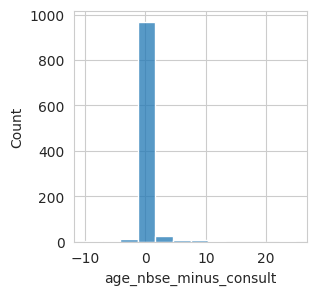

In [99]:
_df = df_nbse.with_columns(
    (pl.col('age') - pl.col('age_at_consult')).alias('age_nbse_minus_consult')
).sort('age_nbse_minus_consult',nulls_last=True)

fig, ax = plt.subplots(1,1,figsize=(3,3))

sns.histplot(
    _df.to_pandas(),
    x='age_nbse_minus_consult'
)

_df.select(pl.col('age_nbse_minus_consult').value_counts())

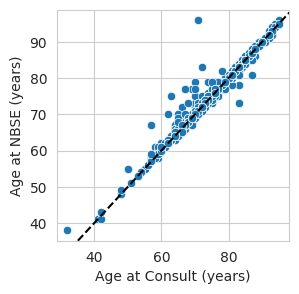

In [87]:
fig, ax = plt.subplots(1,1,figsize=(3,3))

sns.scatterplot(
    df_nbse.to_pandas(),
    x='age_at_consult',
    y='age',
    ax=ax
)

ax.set_xlabel('Age at Consult (years)')
ax.set_ylabel('Age at NBSE (years)')
ax.axline((40,40),(90,90),color='black',linestyle='--')

In [110]:
df_nbse.select('age').describe()

statistic,age
str,f64
"""count""",1858.0
"""null_count""",0.0
"""mean""",74.658235
"""std""",8.0863
"""min""",38.0
"""25%""",70.0
"""50%""",75.0
"""75%""",80.0
"""max""",97.0


# Education

In [125]:
df_nbse.select(
    pl.col('education').cut([8,12,16]).alias('edu_discrete').value_counts(),
).unnest('edu_discrete').with_columns(
(pl.col('count')/pl.col('count').sum() * 100).round(2).alias('percent')
)

edu_discrete,count,percent
cat,u32,f64
null,1,0.05
"""(-inf, 8]""",38,2.05
"""(16, inf]""",242,13.02
"""(12, 16]""",833,44.83
"""(8, 12]""",744,40.04


In [129]:
value_mapping['race']

{1: 'Caucasian', 2: 'Africanamerican', 3: 'Asian', 4: 'other'}

In [148]:
df_inner.select(
    pl.col('race').replace_strict(value_mapping['race']).value_counts()
).unnest('race').sort('count',descending=True).drop_nulls().with_columns(
    (100*pl.col('count')/pl.col('count').sum()).round(2).alias('percent')
)

race,count,percent
str,u32,f64
"""Caucasian""",1261,91.64
"""Africanamerican""",82,5.96
"""other""",28,2.03
"""Asian""",5,0.36
